# 프로젝트: 모든 장르 간 편향성 측정해보기
STEP 1. 형태소 분석기를 이용하여 품사가 명사인 경우 해당 단어를 추출하기  
STEP 2. 추출된 결과로 embedding model 만들기  
STEP 3. target, attribute 단어 셋 만들기  
STEP 4. WEAT score 계산과 시각화  
<br>
**축** (어떤 기준으로 편향성을 볼 것인가?)  
- Target X: 예술영화 (synopsis_art.txt)  
- Target Y: 일반영화 (synopsis_gen.txt)  

**변화하는 비교 대상** (이 장르가 예술에 가까운가, 일반에 가까운가?)  
- Attribute A, B: 드라마, 액션, 로맨스, 코미디, 공포, 전쟁 등
<br>

## 가설
영화의 각 장르는 '예술 영화'와 '일반 영화'라는 두 축 사이에서 유의미한 편향성을 보일 것이다.  
<br>

##팀원간 비교:  
- 토크나이저 통일 (Mecab)
- 임베딩 모델 비교
    - FastText (본인)
    - Word2Vec
<br>

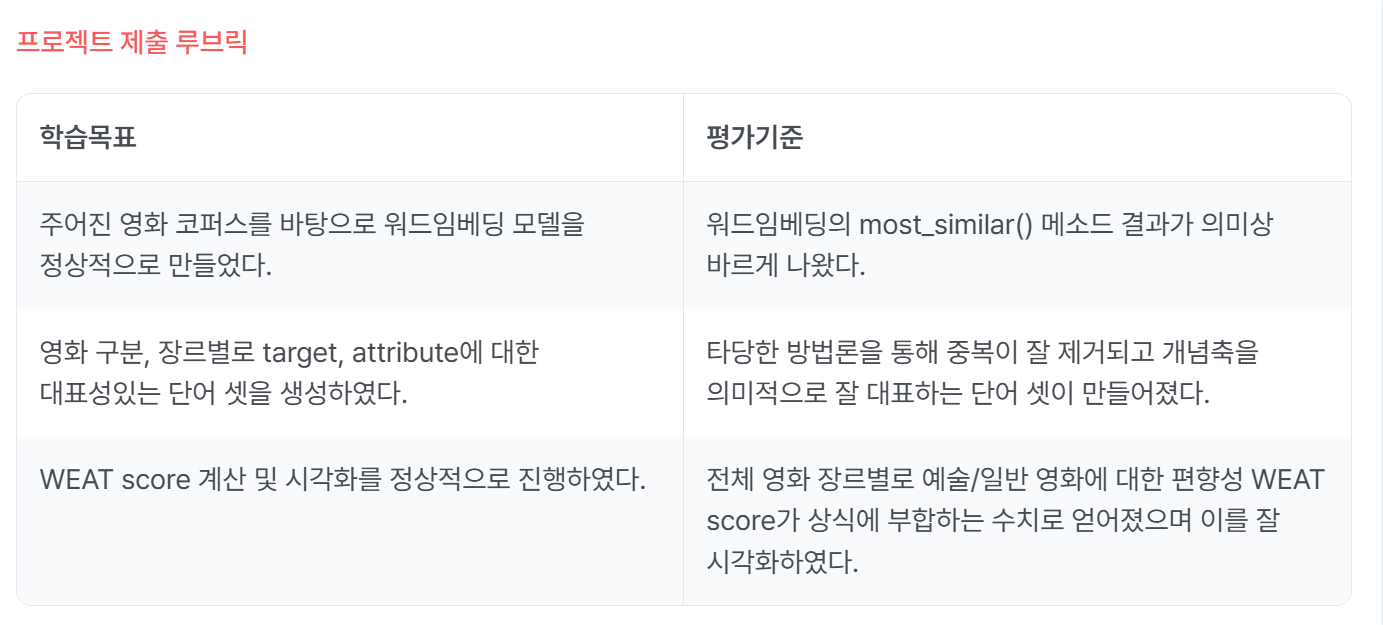

# STEP 0. 패키지 & 데이터 로드

In [2]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab/
!bash install_mecab-ko_on_colab_light_220429.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 138 (delta 26), reused 22 (delta 8), pack-reused 91 (from 1)
Receiving objects: 100% (138/138), 1.72 MiB | 20.91 MiB/s, done.
Resolving deltas: 100% (65/65), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2025-11-19 01:42:35--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.142.25, 104.192.142.24, 104.192.142.26, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.142.25|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?response-content-disposit

In [3]:
!sudo apt update
!sudo apt install default-jre

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:6 https://cli.github.com/packages stable InRelease [3,917 B]
Hit:7 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:8 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 3,917 B in 1s (3,407 B/s)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
41 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: Skipping acquire of

In [2]:
!pip install gensim==4.3.2
!pip install scipy==1.12.0 numpy==1.26.2

!sudo apt update
!sudo apt install openjdk-17-jdk -y
!echo 'export JAVA_HOME=$(dirname $(dirname $(readlink -f $(which java))))' >> ~/.bashrc
!source ~/.bashrc

!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.3/23.3 MB 27.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gensim: filename=gensim-4.3.2-cp312-cp312-linux_x86_64.whl size=26332397 sha256=5400fd76625c5e77e380f7853d83824c7de08a3e548616ea66983691e48c497e
  Stored in directory: /root/.cache/pip/wheels/50/c0/ac/7bb08954bc59d390c848b480a3fc5eec68c14bc77bf334d624
Successfully built gensim
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.4 MB/s eta 0:00:00
  Using cached numpy-1.26.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.8/37.8 MB 25.4 MB/s eta 0:00:00
Using cached numpy-1.26.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully unin

Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,149 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://cli.github.com/packages stable InRelease [3,917 B]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Pa

In [84]:
import os
import time

import konlpy
import gensim
import sklearn
import seaborn as sns
import numpy as np
from numpy import dot
from numpy.linalg import norm
from konlpy.tag import Mecab
from gensim.models import FastText
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
%cd "/content/drive/MyDrive/Colab Notebooks/아이펠/AIFFEL_quest_rs/GoingDeeper/GD03"

/content/drive/MyDrive/Colab Notebooks/아이펠/AIFFEL_quest_rs/GoingDeeper/GD03


In [4]:
# 시놉시스 데이터 확인
data_dir = "./data/"
file_name = os.path.join(data_dir, "synopsis.txt")

with open(file_name, 'r') as file:
    for i in range(20):
        print(file.readline(), end='')

사운드 엔지니어 상우(유지태 분)는 치매에 걸린 할머니(백성희 분)와
 젊은 시절 상처한 한 아버지(박인환 분), 고모(신신애 분)와 함께 살고 있다.
 어느 겨울 그는 지방 방송국 라디오 PD 은수(이영애 분)를 만난다.
 자연의 소리를 채집해 틀어주는 라디오 프로그램을 준비하는 은수는 상우와 녹음 여행을 떠난다.
 자연스레 가까워지는 두 사람은 어느 날, 은수의 아파트에서 밤을 보낸다.
 너무 쉽게 사랑에 빠진 두 사람... 상우는 주체할 수 없을 정도로 그녀에게 빨려든다.
 그러나 겨울에 만난 두 사람의 관계는 봄을 지나 여름을 맞이하면서 삐걱거린다.
 이혼 경험이 있는 은수는 상우에게 결혼할 생각이 없다며 부담스러운 표정을 내비친다.
 "어떻게 사랑이 변하니?..."라고 묻는 상우에게 은수는 그저 "헤어져" 라고 단호하게 말한다.
 영원히 변할 것 같지 않던 사랑이 변하고, 그 사실을 받아들이지 못하는 상우는 어찌 할 바를 모른다.
 은수를 잊지 못하는 상우는 미련과 집착의 감정을 이기지 못하고 서울과 강릉을 오간다.
유사 이래 연령, 성별, 빈부의 차이와 정치적인 입장을 불문하고 일거에 국민을 통합해 온 '애국심'이라는 성역에 일침을 가하는 다큐멘터리. 재작년 전국 민족민주 유가족협의회의 장기농성을 다룬 인상적인 다큐멘터리 <민들레>를 만들었던 독립영화집단 '빨간 눈사람'이 우리 사회 구석구석을 발빠르게 돌아다니며 애국심과 민족주의가 강요되는 현장을 발굴하여 카메라에 담았다. 박홍 서강대 명예총장, 이도형 '한국논단' 발행인, 축구해설자 신문선, 홍세화, 박노해 등 사회 각계의 '스타'들이 등장해 저마다의 확고한 신념을 성토한다. 감독 이경순과 최하동하는 이 작품을 위해 3년간 백여 명을 인터뷰했다고 한다. 2001 올해의 독립영화상 수상.
 민족과 국가란 공동체에서 부단히 권력과 부를 얻는 자, 나아가 민족과 국가란 공동체에서 얻은 신분과 부귀를 영원히 그의 자손에게 대물림하려는 자, 그래서 민족과 국가란 공동체를 부단히 유지해야만 하는 자, 따라서

# STEP 1. 품사가 명사인 단어 추출 (Mecab 사용)

In [6]:
mecab = Mecab()
tokenized = []

with open(file_name, 'r') as file:
    while True:
        line = file.readline()
        if not line: break
        words = mecab.pos(line)
        res = []
        for w in words:
            if w[1] in ["NNG", "NNP", "NP", "NR"]: # 일반명사, 고유명사, 대명사, 수사 포함
                res.append(w[0]) # 명사일 때만 tokenized에 저장
        tokenized.append(res)

print(len(tokenized))

71156


In [9]:
# 샘플 확인
tokenized[:5]

[['사운드', '엔지니어', '상우', '유지태', '분', '치매', '할머니', '백성희', '분'],
 ['시절', '상처', '아버지', '박인환', '분', '고모', '신신애', '분'],
 ['겨울', '그', '지방', '방송국', '라디오', '수', '이영애', '분'],
 ['자연', '소리', '채집', '라디오', '프로그램', '준비', '은수', '상우', '녹음', '여행'],
 ['사람', '날', '은수', '아파트', '밤']]

# STEP 2. Embedding Model(FastText) 생성


In [12]:
%%time

# FastText 모델 학습
fasttext_model = FastText(
    sentences=tokenized,  # 토큰화된 문장 리스트
    window=5,             # 주변 단어 윈도우 크기
    min_count=5,          # 최소 등장 빈도
    workers=4,            # CPU 코어 수
    sg=1                  # 1: skip-gram, 0: CBOW
)

CPU times: user 1min 10s, sys: 601 ms, total: 1min 10s
Wall time: 42.1 s


In [14]:
# 특정 단어 벡터 확인
print(fasttext_model.wv['영화'])

[-0.14409797 -0.4837698   0.52999485  0.0116938  -0.27540532 -0.33590314
 -0.19582564  0.36526084 -0.10974276 -0.74223804  0.7162362  -0.01483916
  0.15879878  0.56605226  0.03763703  0.25427085 -0.05692071  0.08371287
  0.44297892 -0.43326846  0.19553544  0.12379628  0.11779246  0.00953592
  0.09940866  0.21822213 -0.40155074  0.283896   -0.02382935 -0.05092285
 -0.0030751   0.10824969 -0.20004103 -0.21792875 -0.00755777  0.11320157
  0.07544205  0.32155746 -0.13436489  0.21237144  0.1647941   0.12241066
 -0.27136222 -0.11497261 -0.02849569 -0.01816773  0.06292449  0.18339813
 -0.13616392 -0.34781444  0.13058157  0.01229137 -0.31921875  0.2942
 -0.0645767  -0.41734076  0.08319271 -0.33717132  0.01917936 -0.0526159
  0.3225363   0.01215965  0.2019646  -0.19265553 -0.18488155  0.6411492
 -0.46055108  0.18602875 -0.30298197 -0.09592568 -0.16374616  0.02873179
  0.28709093 -0.25316286  0.19674197 -0.26684088 -0.0850794  -0.163046
 -0.18317111 -0.04905779 -0.22872895  0.35440508 -0.1615832

In [15]:
# 단어 유사도 확인
print(fasttext_model.wv.most_similar('영화', topn=5))

[('극영화', 0.7812330722808838), ('영화계', 0.7694202661514282), ('영화인', 0.7613199949264526), ('옴니버스', 0.7606073617935181), ('모큐멘터리', 0.7558795809745789)]


# STEP 3. TF-IDF로 Target, Attribute 단어 셋 만들기

예술영화를 잘 대표하는 단어란 예술영화 시놉시스에는 자주 나타나지만 그 외 다른 구분의 영화 시놉시스에는 자주 나타나지 않는 것을 고르는 것이 적당할 것이므로 **TD-IDF** 사용.  
<br>

**축** (어떤 기준으로 편향성을 볼 것인가?)  
- Target X: 예술영화 (synopsis_art.txt)  
- Target Y: 일반영화 (synopsis_gen.txt)  

**변화하는 비교 대상** (이 장르가 예술에 가까운가, 일반에 가까운가?)  
- Attribute A, B: 드라마, 액션, 로맨스, 코미디, 공포, 전쟁 등

## (1) 영화 구분별 대표 단어 추출

In [27]:
art_txt = 'synopsis_art.txt'
gen_txt = 'synopsis_gen.txt'

def read_token(file_name):
    mecab = Mecab()
    result = []
    with open(data_dir + '/' + file_name, 'r') as fread:
        print(file_name, '파일을 읽고 있습니다.')
        while True:
            line = fread.readline()
            if not line: break
            tokenlist = mecab.pos(line)
            for word in tokenlist:
                if word[1] in ["NNG", "NNP", "NP", "NR"]: # 일반명사, 고유명사, 대명사, 수사 포함
                    result.append((word[0]))
    return ' '.join(result)

In [28]:
# 파일 읽기
art = read_token(art_txt)
gen = read_token(gen_txt)

synopsis_art.txt 파일을 읽고 있습니다.
synopsis_gen.txt 파일을 읽고 있습니다.


In [29]:
# TF-IDF 적용
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([art, gen])

print(X.shape)

(2, 43548)


In [33]:
# 예시 출력
print(vectorizer.vocabulary_['영화'])
print(vectorizer.get_feature_names_out()[25432])

25432
영화


In [34]:
# 영화 구분을 대표하는 단어들 출력

m1 = X[0].tocoo()   # art를 TF-IDF로 표현한 sparse matrix
m2 = X[1].tocoo()   # gen을 TF-IDF로 표현한 sparse matrix

w1 = [[i, j] for i, j in zip(m1.col, m1.data)]
w2 = [[i, j] for i, j in zip(m2.col, m2.data)]

w1.sort(key=lambda x: x[1], reverse=True)   # TF-IDF가 높은 순으로 정렬
w2.sort(key=lambda x: x[1], reverse=True)

print('예술영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names_out()[w1[i][0]], end=', ')

print('\n')

print('일반영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names_out()[w2[i][0]], end=', ')

예술영화를 대표하는 단어들:
그녀, 자신, 시작, 사랑, 사람, 친구, 영화, 남자, 여자, 가족, 이야기, 마을, 마음, 사건, 세상, 아버지, 아이, 엄마, 시간, 세계, 아들, 소녀, 아내, 영화제, 사이, 감독, 하나, 서로, 남편, 비밀, 여행, 인생, 학교, 우리, 발견, 순간, 사실, 생활, 음악, 아빠, 마지막, 기억, 행복, 모습, 죽음, 소년, 도시, 단편, 사고, 이상, 결혼, 한편, 위기, 생각, 관계, 성공, 전쟁, 일상, 경찰, 최고, 인간, 현실, 과거, 미국, 상황, 운명, 결심, 여인, 하루, 이름, 이후, 준비, 동안, 위험, 결국, 감정, 누구, 충격, 부모, 살인, 한국, 연인, 존재, 어머니, 희망, 특별, 국제, 청년, 시절, 그곳, 작품, 작가, 동생, 상처, 여성, 모두, 할머니, 목숨, 사회, 매력, 

일반영화를 대표하는 단어들:
자신, 영화제, 그녀, 사람, 시작, 영화, 친구, 국제, 남자, 사랑, 이야기, 여자, 서울, 사건, 남편, 가족, 아이, 아버지, 세계, 시간, 단편, 마을, 엄마, 마음, 아들, 모습, 관계, 감독, 생각, 작품, 사이, 세상, 발견, 아내, 여성, 소녀, 사실, 하나, 우리, 애니메이션, 이상, 인간, 생활, 죽음, 결혼, 비밀, 상황, 학교, 기억, 도시, 여행, 소년, 순간, 한편, 서로, 경찰, 동안, 과거, 미국, 마지막, 현실, 전쟁, 존재, 일상, 주인공, 사회, 사고, 그곳, 어머니, 연출, 인생, 다큐멘터리, 섹스, 부문, 한국, 살인, 위험, 행복, 최고, 결국, 위기, 의도, 동생, 회사, 조직, 부부, 계획, 일본, 이후, 시절, 성공, 아빠, 문제, 부산, 하루, 음악, 그것, 부모, 운명, 감정, 

중복이 너무 많다.  
중복되지 않게 단어셋 추출해보자.

In [36]:
n = 15
w1_, w2_ = [], []
for i in range(100):
    w1_.append(vectorizer.get_feature_names_out()[w1[i][0]])
    w2_.append(vectorizer.get_feature_names_out()[w2[i][0]])

# w1에만 있고 w2에는 없는, 예술영화를 잘 대표하는 단어를 15개 추출
target_art, target_gen = [], []
for i in range(100):
    if (w1_[i] not in w2_) and (w1_[i] in fasttext_model.wv): target_art.append(w1_[i])
    if len(target_art) == n: break

# w2에만 있고 w1에는 없는, 일반영화를 잘 대표하는 단어를 15개 추출
for i in range(100):
    if (w2_[i] not in w1_) and (w2_[i] in fasttext_model.wv): target_gen.append(w2_[i])
    if len(target_gen) == n: break

In [37]:
print(target_art)
print(target_gen)

['결심', '여인', '이름', '준비', '누구', '충격', '연인', '희망', '특별', '청년', '작가', '상처', '모두', '할머니', '목숨']
['서울', '애니메이션', '주인공', '연출', '다큐멘터리', '섹스', '부문', '의도', '회사', '조직', '부부', '계획', '일본', '문제', '부산']


## (2) 영화 장르별 대표 단어 추출

In [47]:
genre_txt = ['synopsis_SF.txt', 'synopsis_family.txt', 'synopsis_show.txt', 'synopsis_horror.txt', 'synopsis_etc.txt',
             'synopsis_documentary.txt', 'synopsis_drama.txt', 'synopsis_romance.txt', 'synopsis_musical.txt',
             'synopsis_mystery.txt', 'synopsis_crime.txt', 'synopsis_historical.txt', 'synopsis_western.txt',
             'synopsis_adult.txt', 'synopsis_thriller.txt', 'synopsis_animation.txt', 'synopsis_action.txt',
             'synopsis_adventure.txt', 'synopsis_war.txt', 'synopsis_comedy.txt', 'synopsis_fantasy.txt']
genre_name = ['SF', '가족', '공연', '공포(호러)', '기타', '다큐멘터리', '드라마', '멜로로맨스', '뮤지컬', '미스터리', '범죄', '사극', '서부극(웨스턴)',
         '성인물(에로)', '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지']

In [48]:
# 파일 읽기
genre = []
for file_name in genre_txt:
    genre.append(read_token(file_name))

synopsis_SF.txt 파일을 읽고 있습니다.
synopsis_family.txt 파일을 읽고 있습니다.
synopsis_show.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.
synopsis_etc.txt 파일을 읽고 있습니다.
synopsis_documentary.txt 파일을 읽고 있습니다.
synopsis_drama.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_musical.txt 파일을 읽고 있습니다.
synopsis_mystery.txt 파일을 읽고 있습니다.
synopsis_crime.txt 파일을 읽고 있습니다.
synopsis_historical.txt 파일을 읽고 있습니다.
synopsis_western.txt 파일을 읽고 있습니다.
synopsis_adult.txt 파일을 읽고 있습니다.
synopsis_thriller.txt 파일을 읽고 있습니다.
synopsis_animation.txt 파일을 읽고 있습니다.
synopsis_action.txt 파일을 읽고 있습니다.
synopsis_adventure.txt 파일을 읽고 있습니다.
synopsis_war.txt 파일을 읽고 있습니다.
synopsis_comedy.txt 파일을 읽고 있습니다.
synopsis_fantasy.txt 파일을 읽고 있습니다.


In [49]:
# TF-IDF 생성
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre)

print(X.shape)

(21, 44836)


In [50]:
# 장르별 대표 단어 출력
m = [X[i].tocoo() for i in range(X.shape[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)
attributes = []
for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 15):
        if vectorizer.get_feature_names_out()[w[i][j][0]] in fasttext_model.wv:
            attr.append(vectorizer.get_feature_names_out()[w[i][j][0]])
            print(vectorizer.get_feature_names_out()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print()

SF: 자신, 지구, 시작, 사람, 인류, 인간, 세계, 우주, 미래, 그녀, 로봇, 박사, 친구, 외계, 거대, 
가족: 엄마, 아빠, 영화제, 가족, 자신, 친구, 아버지, 시작, 그녀, 사랑, 아들, 마을, 국제, 낙타, 할머니, 
공연: 사랑, 오페라, 비올레타, 실황, 스카르피, 토스카, 백작, 자신, 카바, 레오노라, 그녀, 공연, 알프레도, 오텔로, 리골레토, 
공포(호러): 친구, 시작, 사람, 자신, 그녀, 공포, 사건, 발견, 죽음, 남자, 마을, 이상, 영화, 여자, 가족, 
기타: 영화제, 국제, 서울, 단편, 영화, 자신, 사람, 이야기, 남자, 그녀, 여자, 친구, 사랑, 시작, 페스티벌, 
다큐멘터리: 영화제, 영화, 다큐, 다큐멘터리, 국제, 사람, 이야기, 감독, 자신, 서울, 우리, 세계, 여성, 시작, 그녀, 
드라마: 자신, 영화제, 그녀, 사랑, 영화, 사람, 시작, 남자, 친구, 국제, 여자, 이야기, 엄마, 단편, 가족, 
멜로로맨스: 그녀, 사랑, 남자, 자신, 친구, 여자, 시작, 남편, 사람, 섹스, 마음, 결혼, 아내, 관계, 부부, 
뮤지컬: 뮤지컬, 사랑, 지모도, 에스메랄다, 영화, 프롤, 그녀, 스카르피, 음악, 충무로, 모차르트, 카바, 자신, 영화제, 토스카, 
미스터리: 사건, 그녀, 시작, 자신, 사람, 친구, 사고, 발견, 진실, 죽음, 기억, 남자, 아내, 살인, 민혁, 
범죄: 사건, 자신, 경찰, 시작, 그녀, 범죄, 조직, 살인, 사람, 마약, 형사, 남자, 수사, 여자, 발견, 
사극: 조선, 시작, 사랑, 신기전, 자신, 춘향, 아가멤논, 그녀, 루안, 채선, 황제, 사람, 운명, 최고, 트로이, 
서부극(웨스턴): 아이삭, 보안관, 챔벌린, 서부, 카우보이, 헨리, 마을, 자신, 아르만도, 개릿, 사냥, 바인, 레이프, 시작, 서부극, 
성인물(에로): 그녀, 남편, 성애, 자신, 관계, 남자, 섹스, 정사, 영화, 마사지, 여자, 시작, 친구, 유부녀, 마음, 
스릴러: 자신, 그녀

## 문제점
TF-IDF 처리를 했는데도 중복되는 단어가 많이 보인다.  
<br>

해결법  
1. TF-IDF 값 자체에 장르별 특이도(차별도)를 반영해서 특정 장르에서만 많이 등장하는 단어를 우선 선택 (TfidfVectorizer(sublinear_tf=True))

2. 너무 많은 문서(장르)에 공통적으로 등장하는 단어를 자동으로 무시 (TfidfVectorizer(max_df=0.6))  

3. 위에서 진행했던 "상대방 리스트에 없는 단어만 남긴다(차집합)" 방법  
<br>

또한, 기존 read_token 함수에서는 고유명사, 대명사, 수사도 포함했지만,  
일반명사만을 포함한 새로운 new_read_token 함수로도 실험해본다.

### (1) 기존 read_token 함수 사용
["NNG", "NNP", "NP", "NR"]  
일반명사, 고유명사, 대명사, 수사 포함

In [52]:
# 1. sublinear_tf=True 적용

# TF-IDF 생성
vectorizer = TfidfVectorizer(sublinear_tf=True)
X = vectorizer.fit_transform(genre)

# 장르별 대표 단어 출력
m = [X[i].tocoo() for i in range(X.shape[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)
attributes = []
for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 15):
        if vectorizer.get_feature_names_out()[w[i][j][0]] in fasttext_model.wv:
            attr.append(vectorizer.get_feature_names_out()[w[i][j][0]])
            print(vectorizer.get_feature_names_out()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print()

SF: 분파, 마토바, 영군, 리플리, 옥스, 앤더튼, 켈빈, 미노스, 영건, 히노, 수퍼맨, 키오, 라임, 위저드, 살인귀, 
가족: 씨제이, 소누, 마갈, 제난, 최호, 요세핀, 동구, 낙타, 크리쉬나, 다성, 스노위, 크누드, 푸크시아, 펠리칸, 네이슨, 
공연: 비올레타, 레오노라, 스카르피, 리골레토, 오텔로, 기사장, 아라벨라, 시코, 만토바, 베르디, 토스카, 파미, 비바, 이아고, 프로스페로, 
공포(호러): 료지, 프롱, 악령, 부기맨, 에스터, 사마귀, 분홍, 아사지, 다크니스, 머시, 혜화, 코우다, 볼린저, 에머리, 던칸, 
기타: 메트로, 초달, 에르나니, 포럼, 페소아, 하루야마, 아도니스, 이희현, 세르지뉴, 독도, 영작, 단편, 후루하시, 술방, 미디어, 
다큐멘터리: 클라이머, 다큐, 건축사, 클라이밍, 쌍용, 지라니, 울주, 옥한흠, 김기덕, 퇴진, 코르뷔지에, 석면, 쇼로, 비보이, 소록도, 
드라마: 소냐, 재문, 명주, 보경, 우민, 만수, 주기철, 포럼, 승우, 지운, 재경, 파나히, 세이메이, 치성, 김산, 
멜로로맨스: 하숙생, 조강, 지용, 준철, 원기, 미연, 석호, 대진, 호석, 세희, 성애, 윤재, 구창, 동욱, 유우타, 
뮤지컬: 지모도, 프롤, 에스메랄다, 스카르피, 시앙치, 노트르담, 카바, 데이비, 모차르트, 토스카, 루샤, 파두, 머레, 바레, 살리에리, 
미스터리: 방독면, 랭던, 요하나, 블랙우드, 민혁, 헬마, 한준, 오싱, 시엘, 프리드, 천령, 시게히코, 라트렐, 류수현, 일루미나티, 
범죄: 한길수, 샤오창, 와처, 파푸아, 몬티, 방제수, 오르테가, 안상구, 유레이, 이성호, 토포, 미네르바, 카시우스, 니틀, 고다, 
사극: 신기전, 아가멤논, 루안, 채선, 춘향, 히파티아, 신재효, 중서, 노준의, 허균, 조혁, 브리튼, 광해군, 세자, 아킬레스, 
서부극(웨스턴): 챔벌린, 아이삭, 아르만도, 개릿, 바인, 레이프, 마적, 서부극, 카우보이, 서부, 랜던, 버질, 보안관, 프린트, 소

In [53]:
# 2. max_df 적용

# TF-IDF 생성
vectorizer = TfidfVectorizer(max_df=0.6)
X = vectorizer.fit_transform(genre)

# 장르별 대표 단어 출력
m = [X[i].tocoo() for i in range(X.shape[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)
attributes = []
for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 15):
        if vectorizer.get_feature_names_out()[w[i][j][0]] in fasttext_model.wv:
            attr.append(vectorizer.get_feature_names_out()[w[i][j][0]])
            print(vectorizer.get_feature_names_out()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print()

SF: 외계, 우주선, 생명체, 행성, 스타크, 리플리, 멸망, 수퍼맨, 물체, 분파, 진화, 마토바, 상어, 히노, 섹터, 
가족: 낙타, 씨제이, 동구, 소누, 펠리칸, 크리쉬나, 케이시, 마갈, 제난, 최호, 요세핀, 요정, 네이슨, 베일리, 혜지, 
공연: 오페라, 비올레타, 실황, 스카르피, 토스카, 백작, 카바, 레오노라, 알프레도, 오텔로, 리골레토, 베르디, 콘서트, 타미, 파미, 
공포(호러): 악령, 레드, 생명체, 뱀파이어, 괴담, 심령, 캠핑, 호러, 분홍, 요시오카, 아담, 에이미, 폐쇄, 데이빗, 퇴마, 
기타: 미디어, 영작, 포럼, 메트로, 풍경, 광주, 프라이드, 디지털, 다큐, 퀴어, 언어, 교통, 어린이, 독도, 재연, 
다큐멘터리: 다큐, 노동자, 건축, 북한, 인권, 페스, 풍경, 울주, 건축사, 공동체, 노동, 혁명, 난민, 등반, 산악, 
드라마: 포럼, 독립영화, 퀴어, 축구, 선배, 풍경, 영작, 노동자, 데이트, 제주, 북한, 수정, 인디, 대구, 인권, 
멜로로맨스: 새엄마, 정사, 유부녀, 선배, 성애, 시아버지, 욕구, 성욕, 불륜, 형부, 형수, 현우, 세희, 자위, 마사지, 
뮤지컬: 뮤지컬, 지모도, 에스메랄다, 프롤, 스카르피, 충무로, 모차르트, 카바, 토스카, 시앙치, 데이비, 팬텀, 바흐, 크리스틴, 노트르담, 
미스터리: 민혁, 현우, 방독면, 랭던, 몰카, 홈즈, 프리드, 사이먼, 수연, 요하나, 블랙우드, 동식, 일라이, 승호, 추리, 
범죄: 한길수, 마피아, 프랭크, 파푸아, 금고, 도미닉, 출소, 범행, 매티, 샤오창, 와처, 카시우스, 몬티, 카지노, 신참, 
사극: 신기전, 춘향, 아가멤논, 루안, 채선, 트로이, 히파티아, 신재효, 중서, 노준의, 허균, 세자, 아킬레스, 윤서, 정조, 
서부극(웨스턴): 아이삭, 챔벌린, 카우보이, 아르만도, 개릿, 바인, 레이프, 서부극, 무법자, 프린트, 마적, 랜던, 버질, 스탠리, 소니아, 
성인물(에로): 성애, 정사, 마사지, 유부녀,

In [54]:
# 3. 차집합 방법

# TF-IDF 생성
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre)

# 각 장르별로 TF-IDF 상위 100개 단어를 추출하여 리스트로 저장
genre_top_words = []
for i in range(len(w)):
    temp_words = []
    for j in range(100):  # 상위 100개 단어
        word = vectorizer.get_feature_names_out()[w[i][j][0]]
        temp_words.append(word)
    genre_top_words.append(temp_words)

# 중복 제거 및 대표 단어 15개 추출
attributes = []
n = 15

for i in range(len(genre_name)):
    print(f"{genre_name[i]}: ", end='')

    # 현재 장르(i)를 제외한 다른 모든 장르의 단어들을 하나의 집합(Set)으로 합침
    other_genres_words = set()
    for k in range(len(genre_name)):
        if i != k:  # 내 장르가 아니면
            other_genres_words.update(genre_top_words[k])

    # 대표 단어 선정 시작
    selected_words = []
    for word in genre_top_words[i]:
        # 조건 1: 다른 장르들에 없는 단어인가? (차집합 개념)
        # 조건 2: 모델(fasttext_model)에 존재하는 단어인가?
        if (word not in other_genres_words) and (word in fasttext_model.wv):
            selected_words.append(word)

        if len(selected_words) == n:  # 15개 채우면 중단
            break

    attributes.append(selected_words)
    print(selected_words) # 결과 출력

SF: ['수색', '루이지아나', '맥도먼드', '소싸움', '무공', '복덕', '조피', '마당', '허약', '석양', '소실점', '얼룩', '카비르', '용모', '코엔']
가족: ['나니와', '시브', '도모코', '선인', '턴테이블', '친정집', '총망라', '류예', '장발', '진평', '예인', '남음', '배창호', '피해망상증', '요시카즈']
공연: ['불개미', '승용차', '발기', '라이먼', '아리안', '연구원', '로스', '배구공', '추화', '카츠토시', '키위', '분기탱천', '금연', '시청각', '죄수']
공포(호러): ['십우도', '라브르', '승준', '초래', '필로폰', '복면강도', '예프', '애셔', '텐션', '쿠니코', '레이서', '엔드게임', '와이', '선포', '특산물']
기타: ['매부', '광신도', '데지레', '일견', '블록스', '앞뒤', '조로증', '비상벨', '탐구자', '지역', '앙투와네트', '토론회', '어리', '조잡', '점술가']
다큐멘터리: ['태우', '오프너', '거짓', '곤돌라', '낭만', '동연', '빙하', '타짜', '설총', '노랫말', '지하자원', '국방군', '노론', '베트', '기루']
드라마: ['소민', '펠리', '제각각', '새우잠', '성열', '에마', '진액', '귀기', '크링글리', '대부인', '문기', '셰로', '외무', '나파', '선언식']
멜로로맨스: ['피자', '피죤', '석산', '무트', '터미네이터', '정기', '퍼지', '웅비', '중개', '작정', '정략결혼', '오늘', '잔인', '정력제', '수간호사']
뮤지컬: ['제쉬', '애드', '특별상', '차단', '스릴러극', '대승리', '탈락', '미포', '네스트', '디프랑코', '레츠키', '키리시마', '만취', '미쇼', '제출']
미스터리: ['뮌헨', '박선욱', '라나', '명무', '하야세', '특임', '오대호',

### (2) 일반명사만 포함하는 new_read_token
["NNG"]  

In [71]:
# 새로운 read_token 함수 정의
def new_read_token(file_name):
    mecab = Mecab()
    result = []
    with open(data_dir + '/' + file_name, 'r') as fread:
        print(file_name, '파일을 읽고 있습니다.')
        while True:
            line = fread.readline()
            if not line: break
            tokenlist = mecab.pos(line)
            for word in tokenlist:
                if word[1] in ["NNG"]: # 일반명사만 포함
                    result.append((word[0]))
    return ' '.join(result)

In [72]:
# 장르 파일 읽기
genre = []
for file_name in genre_txt:
    genre.append(new_read_token(file_name))

synopsis_SF.txt 파일을 읽고 있습니다.
synopsis_family.txt 파일을 읽고 있습니다.
synopsis_show.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.
synopsis_etc.txt 파일을 읽고 있습니다.
synopsis_documentary.txt 파일을 읽고 있습니다.
synopsis_drama.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_musical.txt 파일을 읽고 있습니다.
synopsis_mystery.txt 파일을 읽고 있습니다.
synopsis_crime.txt 파일을 읽고 있습니다.
synopsis_historical.txt 파일을 읽고 있습니다.
synopsis_western.txt 파일을 읽고 있습니다.
synopsis_adult.txt 파일을 읽고 있습니다.
synopsis_thriller.txt 파일을 읽고 있습니다.
synopsis_animation.txt 파일을 읽고 있습니다.
synopsis_action.txt 파일을 읽고 있습니다.
synopsis_adventure.txt 파일을 읽고 있습니다.
synopsis_war.txt 파일을 읽고 있습니다.
synopsis_comedy.txt 파일을 읽고 있습니다.
synopsis_fantasy.txt 파일을 읽고 있습니다.


In [73]:
# 1. sublinear_tf=True 적용

# TF-IDF 생성
vectorizer = TfidfVectorizer(sublinear_tf=True)
X = vectorizer.fit_transform(genre)

# 장르별 대표 단어 출력
m = [X[i].tocoo() for i in range(X.shape[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)
attributes = []
for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 15):
        if vectorizer.get_feature_names_out()[w[i][j][0]] in fasttext_model.wv:
            attr.append(vectorizer.get_feature_names_out()[w[i][j][0]])
            print(vectorizer.get_feature_names_out()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print()

SF: 분파, 마토바, 영군, 리플리, 옥스, 앤더튼, 켈빈, 미노스, 영건, 히노, 수퍼맨, 키오, 라임, 위저드, 살인귀, 
가족: 씨제이, 소누, 마갈, 제난, 최호, 요세핀, 동구, 낙타, 크리쉬나, 다성, 스노위, 크누드, 푸크시아, 펠리칸, 네이슨, 
공연: 비올레타, 레오노라, 스카르피, 리골레토, 오텔로, 기사장, 아라벨라, 시코, 만토바, 베르디, 토스카, 파미, 비바, 이아고, 프로스페로, 
공포(호러): 료지, 프롱, 악령, 부기맨, 에스터, 사마귀, 분홍, 아사지, 다크니스, 머시, 혜화, 코우다, 볼린저, 에머리, 던칸, 
기타: 메트로, 초달, 에르나니, 포럼, 페소아, 하루야마, 아도니스, 이희현, 세르지뉴, 독도, 영작, 단편, 후루하시, 술방, 미디어, 
다큐멘터리: 클라이머, 다큐, 건축사, 클라이밍, 쌍용, 지라니, 울주, 옥한흠, 김기덕, 퇴진, 코르뷔지에, 석면, 쇼로, 비보이, 소록도, 
드라마: 소냐, 재문, 명주, 보경, 우민, 만수, 주기철, 포럼, 승우, 지운, 재경, 파나히, 세이메이, 치성, 김산, 
멜로로맨스: 하숙생, 조강, 지용, 준철, 원기, 미연, 석호, 대진, 호석, 세희, 성애, 윤재, 구창, 동욱, 유우타, 
뮤지컬: 지모도, 프롤, 에스메랄다, 스카르피, 시앙치, 노트르담, 카바, 데이비, 모차르트, 토스카, 루샤, 파두, 머레, 바레, 살리에리, 
미스터리: 방독면, 랭던, 요하나, 블랙우드, 민혁, 헬마, 한준, 오싱, 시엘, 프리드, 천령, 시게히코, 라트렐, 류수현, 일루미나티, 
범죄: 한길수, 샤오창, 와처, 파푸아, 몬티, 방제수, 오르테가, 안상구, 유레이, 이성호, 토포, 미네르바, 카시우스, 니틀, 고다, 
사극: 신기전, 아가멤논, 루안, 채선, 춘향, 히파티아, 신재효, 중서, 노준의, 허균, 조혁, 브리튼, 광해군, 세자, 아킬레스, 
서부극(웨스턴): 챔벌린, 아이삭, 아르만도, 개릿, 바인, 레이프, 마적, 서부극, 카우보이, 서부, 랜던, 버질, 보안관, 프린트, 소

In [74]:
# 2. max_df 적용

# TF-IDF 생성
vectorizer = TfidfVectorizer(max_df=0.6)
X = vectorizer.fit_transform(genre)

# 장르별 대표 단어 출력
m = [X[i].tocoo() for i in range(X.shape[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)
attributes = []
for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 15):
        if vectorizer.get_feature_names_out()[w[i][j][0]] in fasttext_model.wv:
            attr.append(vectorizer.get_feature_names_out()[w[i][j][0]])
            print(vectorizer.get_feature_names_out()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print()

SF: 외계, 우주선, 생명체, 행성, 스타크, 리플리, 멸망, 수퍼맨, 물체, 분파, 진화, 마토바, 상어, 히노, 섹터, 
가족: 낙타, 씨제이, 동구, 소누, 펠리칸, 크리쉬나, 케이시, 마갈, 제난, 최호, 요세핀, 요정, 네이슨, 베일리, 혜지, 
공연: 오페라, 비올레타, 실황, 스카르피, 토스카, 백작, 카바, 레오노라, 알프레도, 오텔로, 리골레토, 베르디, 콘서트, 타미, 파미, 
공포(호러): 악령, 레드, 생명체, 뱀파이어, 괴담, 심령, 캠핑, 호러, 분홍, 요시오카, 아담, 에이미, 폐쇄, 데이빗, 퇴마, 
기타: 미디어, 영작, 포럼, 메트로, 풍경, 광주, 프라이드, 디지털, 다큐, 퀴어, 언어, 교통, 어린이, 독도, 재연, 
다큐멘터리: 다큐, 노동자, 건축, 북한, 인권, 페스, 풍경, 울주, 건축사, 공동체, 노동, 혁명, 난민, 등반, 산악, 
드라마: 포럼, 독립영화, 퀴어, 축구, 선배, 풍경, 영작, 노동자, 데이트, 제주, 북한, 수정, 인디, 대구, 인권, 
멜로로맨스: 새엄마, 정사, 유부녀, 선배, 성애, 시아버지, 욕구, 성욕, 불륜, 형부, 형수, 현우, 세희, 자위, 마사지, 
뮤지컬: 뮤지컬, 지모도, 에스메랄다, 프롤, 스카르피, 충무로, 모차르트, 카바, 토스카, 시앙치, 데이비, 팬텀, 바흐, 크리스틴, 노트르담, 
미스터리: 민혁, 현우, 방독면, 랭던, 몰카, 홈즈, 프리드, 사이먼, 수연, 요하나, 블랙우드, 동식, 일라이, 승호, 추리, 
범죄: 한길수, 마피아, 프랭크, 파푸아, 금고, 도미닉, 출소, 범행, 매티, 샤오창, 와처, 카시우스, 몬티, 카지노, 신참, 
사극: 신기전, 춘향, 아가멤논, 루안, 채선, 트로이, 히파티아, 신재효, 중서, 노준의, 허균, 세자, 아킬레스, 윤서, 정조, 
서부극(웨스턴): 아이삭, 챔벌린, 카우보이, 아르만도, 개릿, 바인, 레이프, 서부극, 무법자, 프린트, 마적, 랜던, 버질, 스탠리, 소니아, 
성인물(에로): 성애, 정사, 마사지, 유부녀,

In [75]:
# 3. 차집합 방법

# TF-IDF 생성
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre)

# 각 장르별로 TF-IDF 상위 100개 단어를 추출하여 리스트로 저장
genre_top_words = []
for i in range(len(w)):
    temp_words = []
    for j in range(100):  # 상위 100개 단어
        word = vectorizer.get_feature_names_out()[w[i][j][0]]
        temp_words.append(word)
    genre_top_words.append(temp_words)

# 중복 제거 및 대표 단어 15개 추출
attributes = []
n = 15

for i in range(len(genre_name)):
    print(f"{genre_name[i]}: ", end='')

    # 현재 장르(i)를 제외한 다른 모든 장르의 단어들을 하나의 집합(Set)으로 합침
    other_genres_words = set()
    for k in range(len(genre_name)):
        if i != k:  # 내 장르가 아니면
            other_genres_words.update(genre_top_words[k])

    # 대표 단어 선정 시작
    selected_words = []
    for word in genre_top_words[i]:
        # 조건 1: 다른 장르들에 없는 단어인가? (차집합 개념)
        # 조건 2: 모델(fasttext_model)에 존재하는 단어인가?
        if (word not in other_genres_words) and (word in fasttext_model.wv):
            selected_words.append(word)

        if len(selected_words) == n:  # 15개 채우면 중단
            break

    attributes.append(selected_words)
    print(selected_words) # 결과 출력

SF: ['수석', '루초', '맥박', '소아시아', '무균', '복병', '조혜영', '마도카', '허진스', '석자', '소아', '얼치기', '카슈미르', '용소', '코이케']
가족: ['나데리', '시샘', '도미니카', '선전물', '테드', '칠순', '총지배인', '류정호', '장석구', '진후', '예프', '남인도', '배타', '핀토', '요양원']
공연: ['불구', '승주', '발데리', '라이아', '아마게돈', '연꽃', '로시', '배기관', '축조', '카탈리나', '키토', '분로쿠', '금요일', '시카', '주공']
공포(호러): ['싱구', '라센', '승희', '초식', '필성', '복사본', '옛적', '애연', '템플턴', '쿠르드인', '레이젤', '엔젤레스', '와일', '선혜', '틀기']
기타: ['매스컴', '광신자', '데코', '일당', '블룸', '애간장', '조명', '비서실', '탑승객', '지용', '앞바다', '토모히로', '어맨다', '조지나', '접객업']
다큐멘터리: ['태화', '오해', '거짓말', '곤두박질', '낭만주의', '동원령', '빠름', '타카하시', '섬광', '노량진', '지휘부', '국방부', '노르마', '베히', '기르']
드라마: ['소방대', '편보승', '제니스', '새터민', '성유리', '에미르', '진임', '귀국', '클라리스', '대사관', '문득', '셰이크', '외압', '나폴레온', '선의']
멜로로맨스: ['피콜리', '피타고라스', '석유통', '무현', '털리', '정려원', '펑위옌', '워즈니악', '중국학', '잔디밭', '정미', '오덴세', '잘못', '정민아', '수갑']
뮤지컬: ['제이니', '애리조나주', '특파원', '차벨라', '스멀더스', '대양', '탈의실', '미하일', '네슨', '딜래니', '레터', '키시', '만한', '미술상', '제훈']
미스터리: ['뮬러', '박소담', '라덴', '명부', '하월', 

## 최종 해결 방법
명사 종류 필터링:  
- 고유명사, 대명사, 수사는 노이즈가 될 수 있다고 생각해서 제외했는데,
- 기존 함수와 일반명사만 포함한 new_read_token 함수의 결과를 비교해보니
- 이름 같은 고유명사가 완전히 필터링 되지는 않았지만, 그래도 어느정도는 고유명사의 비율이 줄어든 것을 확인했다.  
- 따라서 일반명사만 걸러내는 new_read_token 함수를 사용한다.

중복 필터링 방법:  
- 3번은 중복을 모두 제외하는 차집합이다 보니 지엽적인 단어들이 너무 많고,  
- 1번은 2번에 비해 고유명사가 차지하는 비율이 높아 보인다.  
- 따라서 2번 max_df 방법을 사용한다.  

결론:  
문서를 읽을 때, **일반 명사**만 필터링하고 max_df로 중복을 완화한다.

# STEP 3.5 새로운 함수로 임베딩 모델(FastText) 학습 & 단어 셋 다시 만들기

## (0) FastText 학습

In [89]:
data_dir = "./data/"
file_name = os.path.join(data_dir, "synopsis.txt")

mecab = Mecab()
tokenized = []

with open(file_name, 'r') as file:
    while True:
        line = file.readline()
        if not line: break
        words = mecab.pos(line)
        res = []
        for w in words:
            if w[1] in ["NNG"]: # 일반명사
                res.append(w[0])
        tokenized.append(res)

In [90]:
%%time

# FastText 모델 학습
fasttext_model = FastText(
    sentences=tokenized,  # 토큰화된 문장 리스트
    window=5,             # 주변 단어 윈도우 크기
    min_count=5,          # 최소 등장 빈도
    workers=4,            # CPU 코어 수
    sg=1                  # 1: skip-gram, 0: CBOW
)

CPU times: user 54.7 s, sys: 469 ms, total: 55.2 s
Wall time: 33.3 s


In [91]:
# 특정 단어 벡터 확인
print(fasttext_model.wv['영화'])

# 단어 유사도 확인
print(fasttext_model.wv.most_similar('영화', topn=5))

[ 0.13943166 -0.46983767  0.43933755  0.15318823 -0.0493264  -0.2130337
 -0.0453765   0.14286518 -0.10609958 -0.39343852  0.52320904  0.08479027
 -0.09886977  0.6628959  -0.11813083  0.0480913  -0.11619322  0.10613248
  0.5062161  -0.30046818 -0.00074817 -0.06846803  0.29120624 -0.2796617
 -0.06934947 -0.00302575 -0.3078556   0.23000315 -0.04035355 -0.19239163
  0.11385161  0.18859208 -0.13880104  0.3001735   0.25843203 -0.0687898
  0.21651945  0.6359186  -0.4717348  -0.12783094  0.04329642  0.04098598
 -0.315238    0.09861535  0.32644105 -0.11367622  0.1458781   0.27777064
 -0.1532344  -0.54654574  0.1858387  -0.17630936 -0.10529205  0.19804263
  0.15736277  0.03893298 -0.47808877  0.04510162 -0.15813413  0.35332114
  0.28695494 -0.1972476   0.27756473 -0.2912113  -0.05019499  0.09404103
  0.01194524  0.20711778 -0.10618624  0.26126564 -0.00336953  0.00142642
  0.07418646 -0.09062671  0.08234948 -0.21461055 -0.18178739 -0.10099629
  0.28302035  0.02643609 -0.41819954 -0.00800804 -0.31

## (1) 영화 구분 (Target)

In [92]:
# --- 1. 파일 읽기 ---
art = new_read_token(art_txt)
gen = new_read_token(gen_txt)

# --- 2. TF-IDF 적용 ---
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([art, gen])

# --- 3. art, gen의 대표 단어 출력 ---
m1 = X[0].tocoo()   # art를 TF-IDF로 표현한 sparse matrix
m2 = X[1].tocoo()   # gen을 TF-IDF로 표현한 sparse matrix

w1 = [[i, j] for i, j in zip(m1.col, m1.data)]
w2 = [[i, j] for i, j in zip(m2.col, m2.data)]

w1.sort(key=lambda x: x[1], reverse=True)   # TF-IDF가 높은 순으로 정렬
w2.sort(key=lambda x: x[1], reverse=True)

# --- 4. 중복 제거 후 출력 ---
n = 15
w1_, w2_ = [], []
for i in range(100):
    w1_.append(vectorizer.get_feature_names_out()[w1[i][0]])
    w2_.append(vectorizer.get_feature_names_out()[w2[i][0]])

target_art, target_gen = [], []
for i in range(100):
    if (w1_[i] not in w2_) and (w1_[i] in fasttext_model.wv): target_art.append(w1_[i])
    if len(target_art) == n: break

for i in range(100):
    if (w2_[i] not in w1_) and (w2_[i] in fasttext_model.wv): target_gen.append(w2_[i])
    if len(target_gen) == n: break

print(target_art)
print(target_gen)

synopsis_art.txt 파일을 읽고 있습니다.
synopsis_gen.txt 파일을 읽고 있습니다.
['여인', '이름', '충격', '연인', '희망', '특별', '청년', '작가', '상처', '모두', '목숨', '매력', '진실', '프랑스', '만남']
['서울', '애니메이션', '주인공', '연출', '다큐멘터리', '섹스', '부문', '의도', '회사', '조직', '부부', '문제', '부산', '경쟁', '사진']


## (2) 영화 장르 (Attribute)

In [93]:
# --- 1. 파일 읽기 ---
genre = []
for file_name in genre_txt:
    genre.append(new_read_token(file_name)) # new_read_token 함수로 교체

# --- 2. max_df 적용한 TF-IDF ---
vectorizer = TfidfVectorizer(max_df=0.6)
X = vectorizer.fit_transform(genre)

# --- 3. 장르별 대표 단어 출력 ---
m = [X[i].tocoo() for i in range(X.shape[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)
attributes = []
for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 15):
        if vectorizer.get_feature_names_out()[w[i][j][0]] in fasttext_model.wv:
            attr.append(vectorizer.get_feature_names_out()[w[i][j][0]])
            print(vectorizer.get_feature_names_out()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print()

synopsis_SF.txt 파일을 읽고 있습니다.
synopsis_family.txt 파일을 읽고 있습니다.
synopsis_show.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.
synopsis_etc.txt 파일을 읽고 있습니다.
synopsis_documentary.txt 파일을 읽고 있습니다.
synopsis_drama.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_musical.txt 파일을 읽고 있습니다.
synopsis_mystery.txt 파일을 읽고 있습니다.
synopsis_crime.txt 파일을 읽고 있습니다.
synopsis_historical.txt 파일을 읽고 있습니다.
synopsis_western.txt 파일을 읽고 있습니다.
synopsis_adult.txt 파일을 읽고 있습니다.
synopsis_thriller.txt 파일을 읽고 있습니다.
synopsis_animation.txt 파일을 읽고 있습니다.
synopsis_action.txt 파일을 읽고 있습니다.
synopsis_adventure.txt 파일을 읽고 있습니다.
synopsis_war.txt 파일을 읽고 있습니다.
synopsis_comedy.txt 파일을 읽고 있습니다.
synopsis_fantasy.txt 파일을 읽고 있습니다.
SF: 외계, 우주선, 생명체, 행성, 스타크, 리플리, 멸망, 수퍼맨, 물체, 분파, 진화, 마토바, 상어, 히노, 섹터, 
가족: 낙타, 씨제이, 동구, 소누, 펠리칸, 크리쉬나, 케이시, 마갈, 제난, 최호, 요세핀, 요정, 네이슨, 베일리, 혜지, 
공연: 오페라, 비올레타, 실황, 스카르피, 토스카, 백작, 카바, 레오노라, 알프레도, 오텔로, 리골레토, 베르디, 콘서트, 타미, 파미, 
공포(호러): 악령, 레드, 생명체, 뱀파이어, 괴담, 심령, 캠핑, 호러, 분홍, 요시오카, 아담, 에이미, 폐쇄, 데이빗, 퇴마, 


# STEP 4. WEAT score 계산과 시각화

## WEAT score 계산

In [94]:
# 계산 함수 정의

# 코사인 유사도
def cos_sim(i, j):
    return dot(i, j.T)/(norm(i)*norm(j))

# 단어-집합 유사도
## 단어 w가 집합 A 쪽으로 얼마나 치우쳐 있는지
def s(w, A, B):
    c_a = cos_sim(w, A)
    c_b = cos_sim(w, B)
    mean_A = np.mean(c_a, axis=-1)
    mean_B = np.mean(c_b, axis=-1)
    return mean_A - mean_B

# WEAT score
## 양수 → X 단어 집합이 A 속성 쪽으로 더 치우침
## 음수 → Y 단어 집합이 A 속성 쪽으로 더 치우침
def weat_score(X, Y, A, B):

    s_X = s(X, A, B)
    s_Y = s(Y, A, B)

    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)

    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))

    return (mean_X - mean_Y)/std_dev

In [95]:
# 빈 행렬 생성
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]

# 예술/일반 영화 단어들 벡터화
X = np.array([fasttext_model.wv[word] for word in target_art]) # 예술 영화
Y = np.array([fasttext_model.wv[word] for word in target_gen]) # 일반 영화

# 모든 장르 쌍 비교
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        A = np.array([fasttext_model.wv[word] for word in attributes[i]]) # 장르 A 벡터화
        B = np.array([fasttext_model.wv[word] for word in attributes[j]]) # 장르 B 벡터화
        matrix[i][j] = weat_score(X, Y, A, B) # 점수 계산 및 저장

# 계산된 값 출력
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        print(genre_name[i], genre_name[j],matrix[i][j])

SF 가족 -0.57779384
SF 공연 -0.41831142
SF 공포(호러) -0.88488173
SF 기타 0.61678
SF 다큐멘터리 0.38297102
SF 드라마 0.43117464
SF 멜로로맨스 -0.100421175
SF 뮤지컬 -0.669186
SF 미스터리 -0.61233056
SF 범죄 -0.23932584
SF 사극 -0.6603527
SF 서부극(웨스턴) -0.23913872
SF 성인물(에로) 0.010047867
SF 스릴러 -0.50497115
SF 애니메이션 0.4005689
SF 액션 -0.54563904
SF 어드벤처 -0.8049122
SF 전쟁 -0.34092167
SF 코미디 -0.3551704
SF 판타지 -0.930726
가족 공연 0.056889966
가족 공포(호러) -0.5092293
가족 기타 0.85651803
가족 다큐멘터리 0.7844612
가족 드라마 0.89822227
가족 멜로로맨스 0.14399722
가족 뮤지컬 -0.192141
가족 미스터리 -0.41481352
가족 범죄 0.21238133
가족 사극 -0.19098242
가족 서부극(웨스턴) 0.40356684
가족 성인물(에로) 0.31454816
가족 스릴러 -0.09743392
가족 애니메이션 0.9369477
가족 액션 -0.09781303
가족 어드벤처 -0.074761644
가족 전쟁 0.13199474
가족 코미디 -0.017121296
가족 판타지 -0.58149374
공연 공포(호러) -0.45617452
공연 기타 0.8116323
공연 다큐멘터리 0.6903735
공연 드라마 0.83548033
공연 멜로로맨스 0.13313451
공연 뮤지컬 -0.3112484
공연 미스터리 -0.44906333
공연 범죄 0.18364283
공연 사극 -0.23819788
공연 서부극(웨스턴) 0.32417354
공연 성인물(에로) 0.31058368
공연 스릴러 -0.14191423
공연 애니메이션 0.7083399
공연 액션 -

## 시각화

### Heatmap

In [83]:
!apt-get update -qq
!apt-get install -qq fonts-nanum

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 122721 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


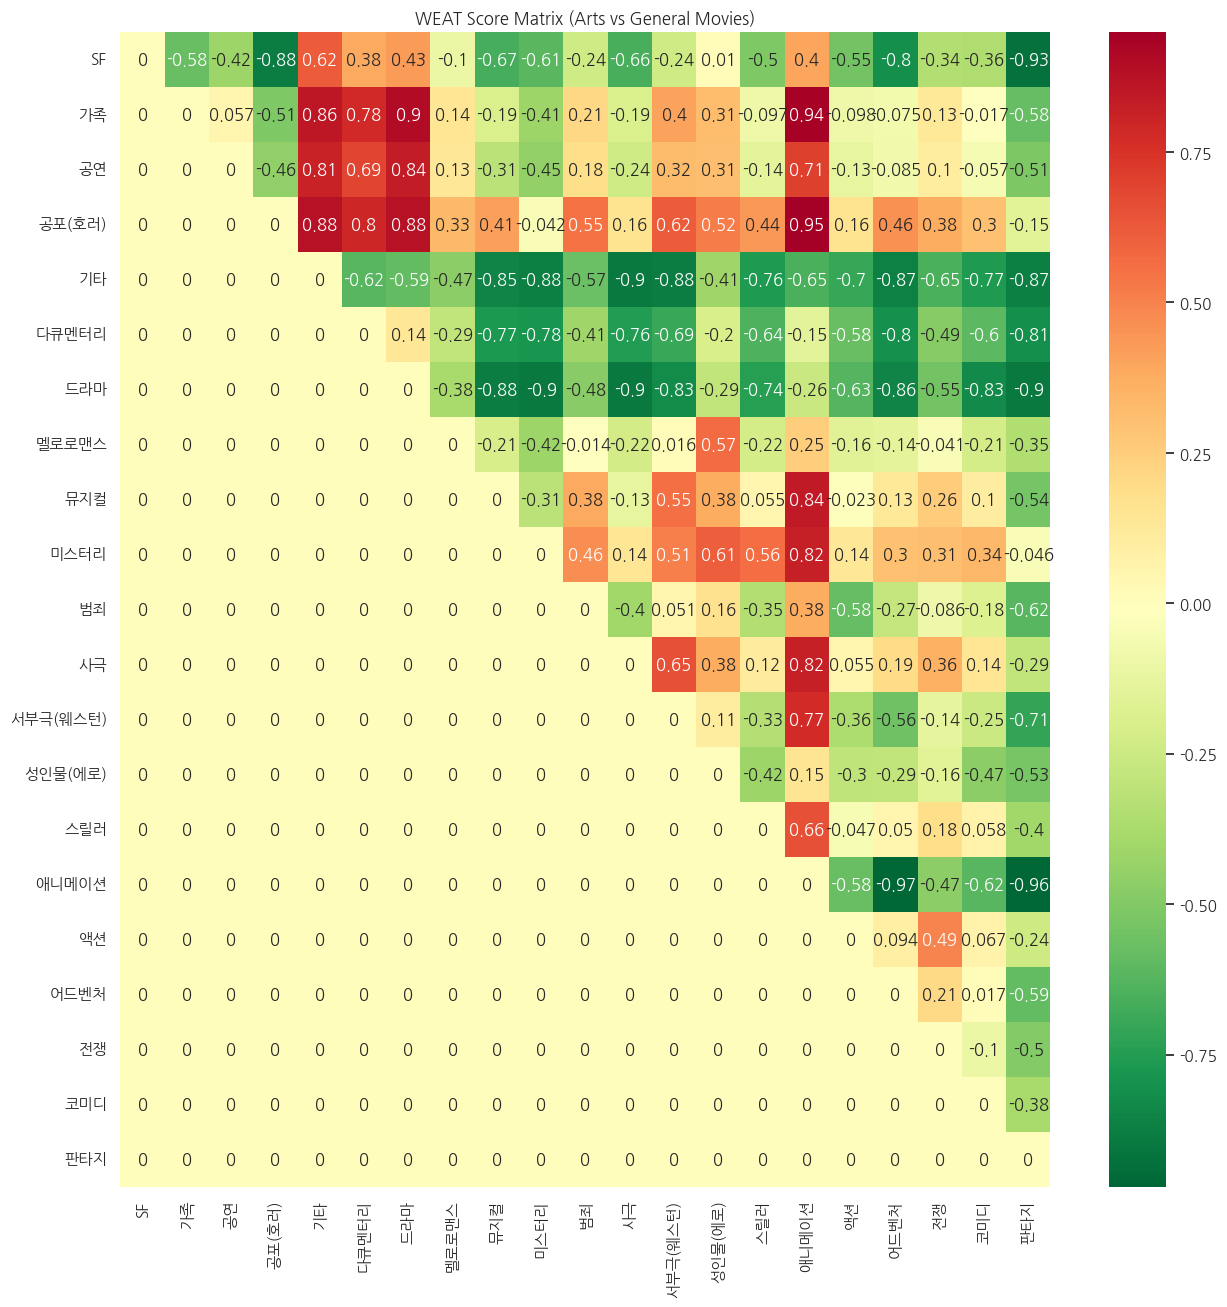

In [100]:
plt.figure(figsize=(15, 15))
sns.heatmap(matrix, xticklabels=genre_name, yticklabels=genre_name, annot=True, cmap='RdYlGn_r')
plt.title("WEAT Score Matrix (Arts vs General Movies)")
plt.show()

빨간색:
- 세로축의 장르가 일반 영화(General) 성향이 강하고,
- 가로축의 장르가 예술 영화(Art) 성향이 강하다는 의미.  
- ex: 공포 vs 드라마 = 0.88
    - 공포는 일반 영화, 드라마는 예술 영화.

초록색:
- 빨간색과 반대로  
- 세로축의 장르가 예술 영화(Art) 성향이 강하고,
- 가로축의 장르가 일반 영화(General) 성향이 강하다는 의미.  
- ex: 드라마 vs 액션 = -0.63
    - 드라마는 예술 영화, 액션은 일반 영화.
<br>

애니메이션 장르의 경우 세로축이 거의 빨간색인데, 다른 영화와 비교했을 때 거의 예술 영화 쪽에 가깝다는 의미

### T-SNE

In [108]:
import plotly.express as px
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # 3D 그래프용 툴킷

# 1. 시각화할 단어와 벡터 모으기
embedding_clusters = []
word_clusters = []
labels = []

# (1) Target 축 (예술 vs 일반) 추가
for word in target_art:
    if word in fasttext_model.wv:
        embedding_clusters.append(fasttext_model.wv[word])
        word_clusters.append(word)
        labels.append('예술영화(Art)')

for word in target_gen:
    if word in fasttext_model.wv:
        embedding_clusters.append(fasttext_model.wv[word])
        word_clusters.append(word)
        labels.append('일반영화(Gen)')

# (2) 각 장르별 대표 단어 추가
for i in range(len(genre_name)):
    for word in attributes[i]:
        if word in fasttext_model.wv:
            embedding_clusters.append(fasttext_model.wv[word])
            word_clusters.append(word)
            labels.append(genre_name[i])

# 2. t-SNE 차원 축
# n_components=3 으로 설정
tsne_model_en_3d = TSNE(perplexity=15, n_components=3, init='pca', max_iter=3500, random_state=32)
embeddings_en_3d = np.array(embedding_clusters)
embeddings_en_3d = tsne_model_en_3d.fit_transform(embeddings_en_3d)

# 3. 데이터프레임 생성
tsne_df = pd.DataFrame(embeddings_en_3d, columns=['x', 'y', 'z'])
tsne_df['word'] = word_clusters
tsne_df['label'] = labels

# 4. Plotly로 3D 산점도 그리기
fig = px.scatter_3d(
    tsne_df,
    x='x',
    y='y',
    z='z',
    color='label',       # 장르별로 색상 구분
    hover_name='word',   # 마우스를 올렸을 때 단어 표시
    symbol='label',      # 장르별로 점 모양 다르게 (선택 사항)
    opacity=0.7,         # 투명도 조절
    size_max=10,         # 점 최대 크기
    title='Interactive 3D t-SNE Visualization (Mouse Rotate Available)'
)

# 5. 스타일 다듬기 (점 크기 조정 등)
fig.update_traces(marker=dict(size=5)) # 점 크기를 5로 일괄 설정

# 6. 레이아웃 설정 (배경색, 크기 등)
fig.update_layout(
    margin=dict(l=0, r=0, b=0, t=40), # 여백 줄이기
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
    ),
    height=800 # 그래프 높이 설정
)

# 5. 출력
fig.show()

### WordCloud

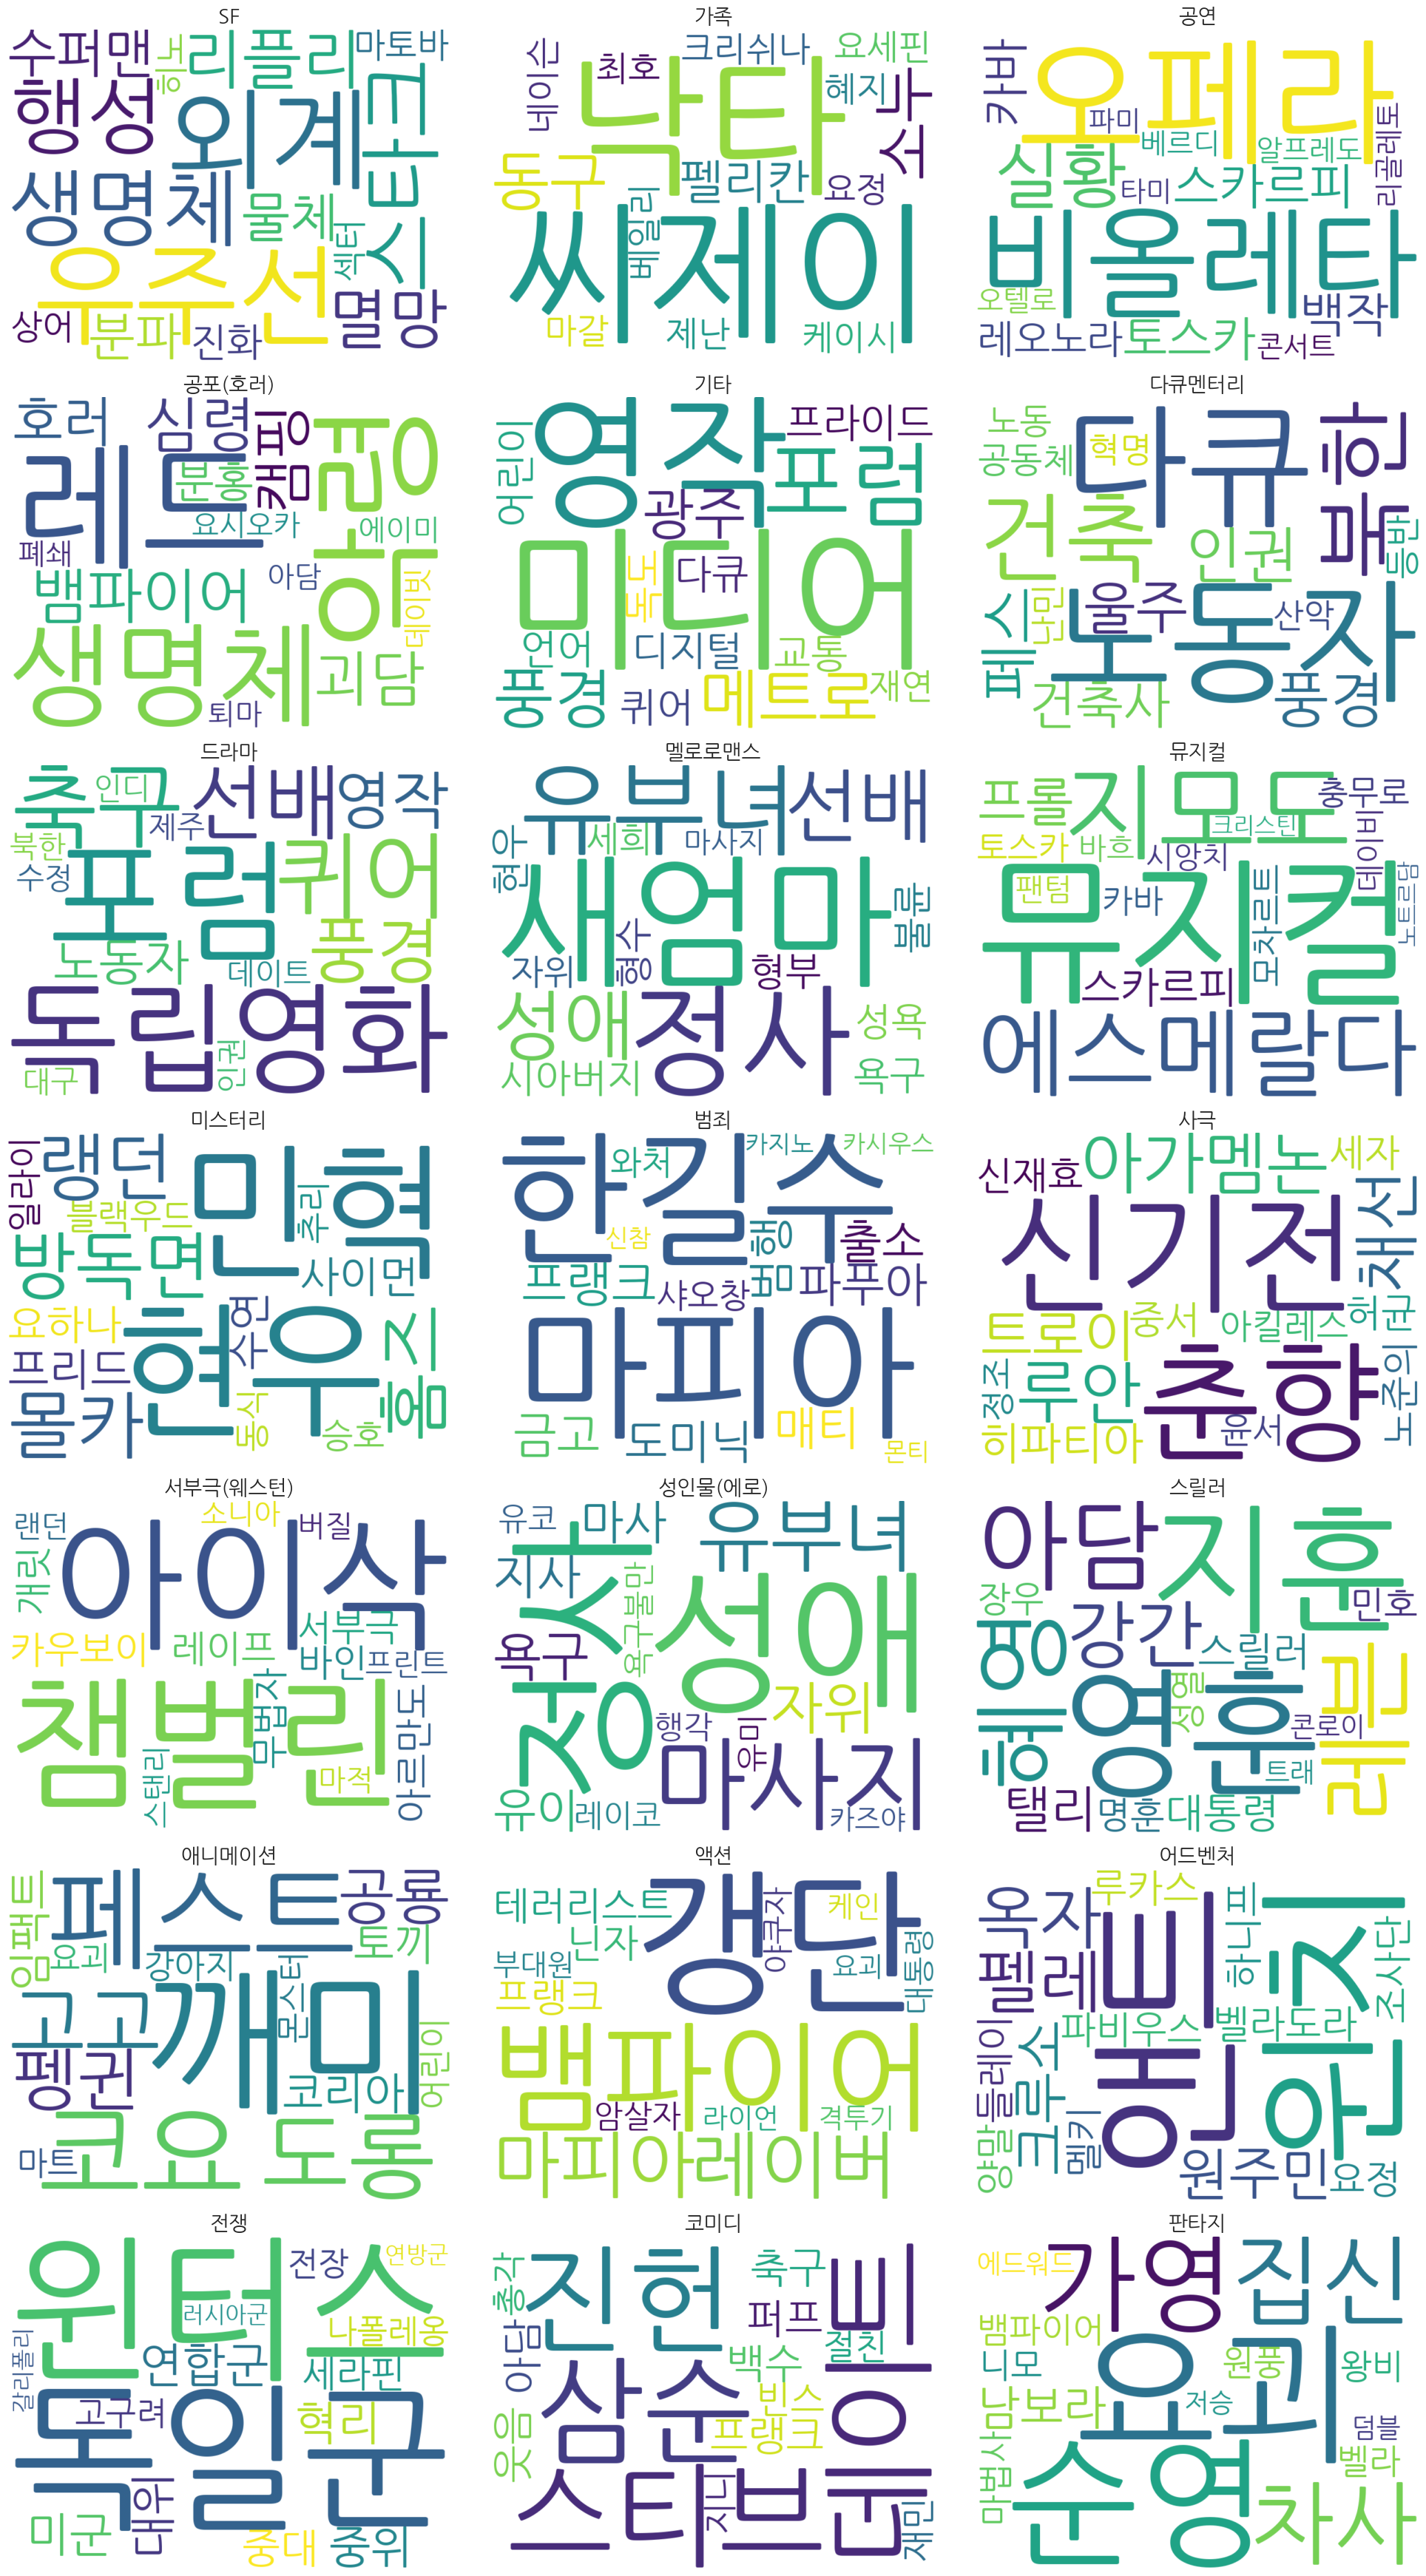

In [103]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 한글 폰트 경로 (Colab 기준)
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# 워드 클라우드 설정
wc = WordCloud(
    font_path=font_path,
    background_color='white',
    width=800,
    height=600,
    max_words=50
)

# 서브플롯 설정 (행 수 계산: 21개 장르 / 3열 = 7행)
n_cols = 3
n_rows = (len(genre_name) + n_cols - 1) // n_cols

plt.figure(figsize=(20, 5 * n_rows))

for i in range(len(genre_name)):
    # 해당 장르의 단어들을 공백으로 이어 붙임
    text = ' '.join(attributes[i])

    # 워드 클라우드 생성
    gen_wc = wc.generate(text)

    # 서브플롯에 그리기
    plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(gen_wc, interpolation='bilinear')
    plt.title(f"{genre_name[i]}", fontsize=20)
    plt.axis('off')

plt.tight_layout()
plt.show()

# 결론
WEAT Score 해석 방법:  
- 양수 값: 앞쪽 장르(A)가 일반 영화(General) 성향이 강하고, 뒤쪽 장르(B)가 예술 영화(Art) 성향이 강함.
- 음수 값: 앞쪽 장르(A)가 예술 영화(Art) 성향이 강하고, 뒤쪽 장르(B)가 일반 영화(General) 성향이 강함.
- 절댓값이 클수록 두 장르 간의 성향 차이가 뚜렷함.  
<br>

### 예시
SF 다큐멘터리 0.5914404  
- SF는 일반 영화에 가깝고, 다큐멘터리는 예술 영화에 가깝다.  

드라마 액션 -0.8666571   
- 드라마는 예술 영화에 가깝고, 액션은 일반 영화에 가깝다.  

공포(호러) 드라마 0.9785504
- 공포 영화는 일반 영화에 가깝고, 드라마는 예술 영화에 가깝다. (이건 강도가 특히 높음)  
<br>

### 가설
처음에 세웠던 가설 *"영화의 각 장르는 '예술 영화'와 '일반 영화'라는 두 축 사이에서 유의미한 편향성을 보일 것이다."* 를 WEAT Score을 통해 검증해본 결과,  
예술 영화와 일반 영화라는 두 축 사이에서 각 장르들의 다양한 편향이 존재한다는 것을 확인했다.  
<br>

### Word2Vec과의 비교 (CBow)
수치가 동일하지는 않지만, 분포가 매우 유사하다는 것을 알 수 있다.  
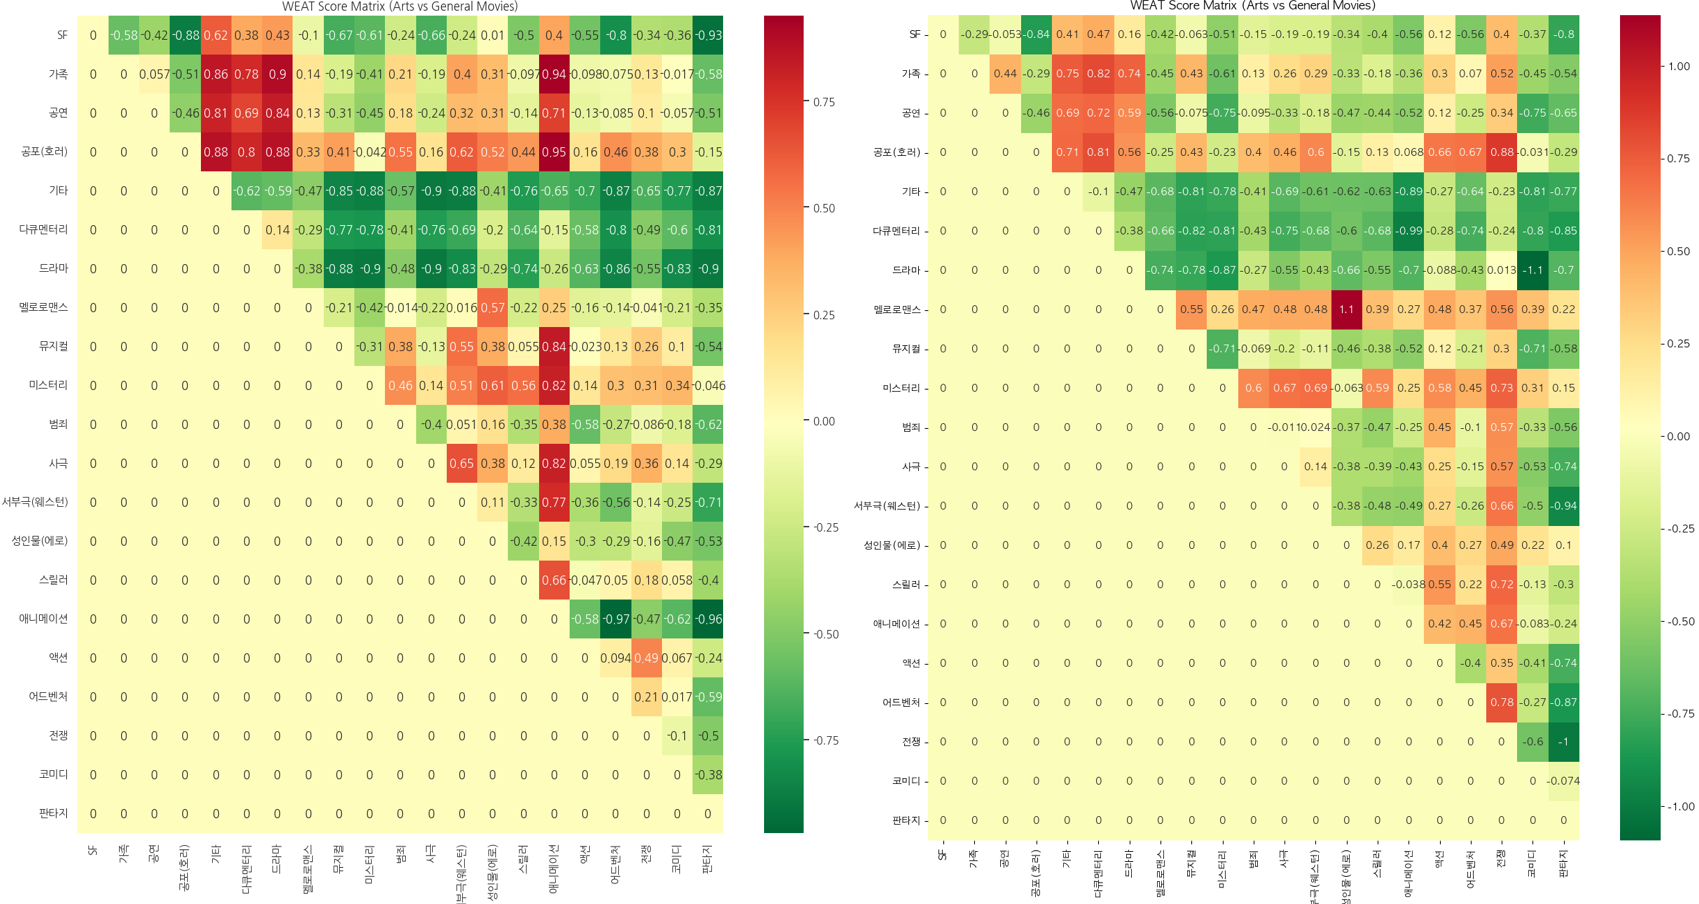

# 회고
평소에 데이터로 모델 학습을 시키면서도 '편향'이라는 개념을 생각도 안 하고 있었는데,  
이번 프로젝트를 진행하며 "인간의 편향 -> 데이터의 편향 -> 모델의 편향" 이라는 관점으로 편향에 대해 생각해볼 수 있는 경험이었다.  